In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [25]:
# Load dataset
df = pd.read_csv("Pca_data.csv")

In [26]:
# Check for missing values
print(df.isnull().sum())

PCA_Component_1     0
PCA_Component_2     0
PCA_Component_3     0
PCA_Component_4     0
PCA_Component_5     0
PCA_Component_6     0
PCA_Component_7     0
PCA_Component_8     0
PCA_Component_9     0
PCA_Component_10    0
Diabetes_binary     0
dtype: int64


In [27]:
# Separate features (X) and target (y)
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

In [34]:
# Apply Mutual Information
feature_selection = SelectKBest(score_func = mutual_info_classif, k = 9)
feature_selection.fit(X,y)

,score_func,<function mut...002E2FAD2FCE0>
,k,9


In [35]:
# Get scores
mutual_score = pd.Series(feature_selection.scores_, index = X.columns)
mutual_score

PCA_Component_1     0.222025
PCA_Component_2     0.068779
PCA_Component_3     0.009449
PCA_Component_4     0.006706
PCA_Component_5     0.023794
PCA_Component_6     0.043552
PCA_Component_7     0.023012
PCA_Component_8     0.001974
PCA_Component_9     0.022497
PCA_Component_10    0.003720
dtype: float64

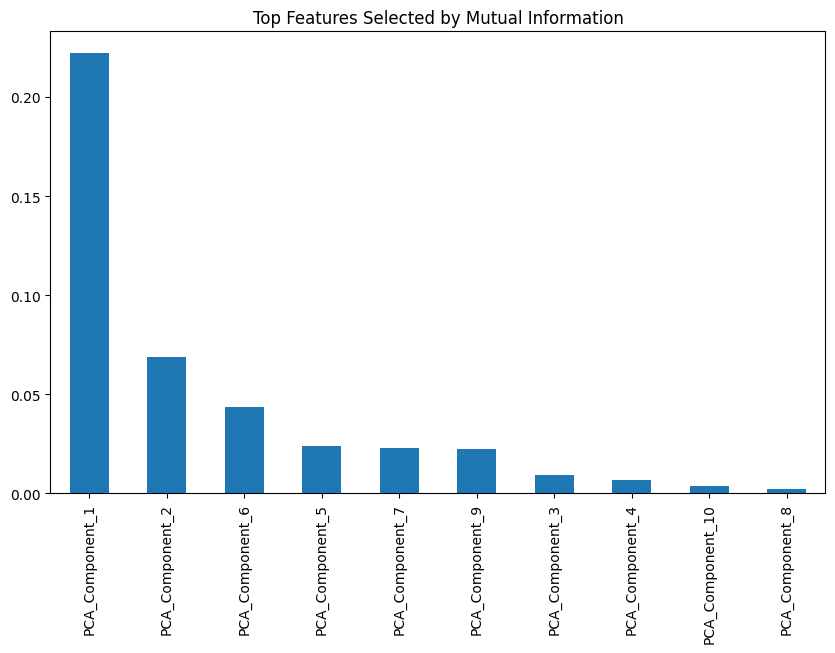

In [36]:
# Plot top features
mutual_score.sort_values(ascending = False).plot.bar(figsize = (10, 6))
plt.title("Top Features Selected by Mutual Information")
plt.show()

In [38]:
# Transform dataset
selected_columns = mutual_score.sort_values(ascending=False).head(9).index
X_selected = feature_selection.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected, columns=selected_columns)

In [39]:
# Before selection
X.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10
0,-0.964592,-0.673254,0.202255,1.777095,1.565390,0.772754,-0.942447,0.020197,0.489279,0.261438
1,0.414179,1.720757,-0.851817,1.279823,-1.565252,0.814425,-1.605545,-1.664487,-0.714420,-0.783478
2,-2.550243,0.941238,0.852109,0.411577,-0.331868,0.341884,-0.850654,0.373368,0.135337,-0.097125
3,-0.912848,1.780567,0.144106,1.137837,-0.191583,-0.714002,0.408292,0.444651,0.208366,0.877030
4,-2.271401,0.189478,-0.017099,0.858812,-0.466228,-0.040059,-0.114559,1.463172,0.849091,-0.431611


In [40]:
# After selection
X_selected.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_6,PCA_Component_5,PCA_Component_7,PCA_Component_9,PCA_Component_3,PCA_Component_4,PCA_Component_10
0,-0.964592,-0.673254,0.202255,1.777095,1.565390,0.772754,-0.942447,0.489279,0.261438
1,0.414179,1.720757,-0.851817,1.279823,-1.565252,0.814425,-1.605545,-0.714420,-0.783478
2,-2.550243,0.941238,0.852109,0.411577,-0.331868,0.341884,-0.850654,0.135337,-0.097125
3,-0.912848,1.780567,0.144106,1.137837,-0.191583,-0.714002,0.408292,0.208366,0.877030
4,-2.271401,0.189478,-0.017099,0.858812,-0.466228,-0.040059,-0.114559,0.849091,-0.431611


In [42]:

# Combine with target
final_set = pd.concat([X_selected, y], axis=1)

In [43]:
final_set.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_6,PCA_Component_5,PCA_Component_7,PCA_Component_9,PCA_Component_3,PCA_Component_4,PCA_Component_10,Diabetes_binary
0,-0.964592,-0.673254,0.202255,1.777095,1.565390,0.772754,-0.942447,0.489279,0.261438,0
1,0.414179,1.720757,-0.851817,1.279823,-1.565252,0.814425,-1.605545,-0.714420,-0.783478,0
2,-2.550243,0.941238,0.852109,0.411577,-0.331868,0.341884,-0.850654,0.135337,-0.097125,0
3,-0.912848,1.780567,0.144106,1.137837,-0.191583,-0.714002,0.408292,0.208366,0.877030,0
4,-2.271401,0.189478,-0.017099,0.858812,-0.466228,-0.040059,-0.114559,0.849091,-0.431611,0


In [45]:
final_set.to_csv('final_set_te.csv', index=False)